<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#선형회귀" data-toc-modified-id="선형회귀-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>선형회귀</a></span></li></ul></div>

In [1]:
import tensorflow as tf

* placeholder: 변수 선언
* session:
    * session.run 을해야 실행함
* 전체 알고리즘을 기술하고, session에서 구동하는 구조
* 텐서플로는 그래프구조(Node, Egde)로 구성됐다.
* 텐서보드
    * 연산 시각화
    * $ tensorboard --logdir='디렉터리'

In [3]:
# 곱셈
a = tf.placeholder('float')
b = tf.placeholder('float')

y = tf.multiply(a, b)

sess = tf.Session()

print(sess.run(y, feed_dict={a: 3, b:3}))

9.0


## 선형회귀

In [5]:
import numpy as np
import matplotlib.pyplot as plt

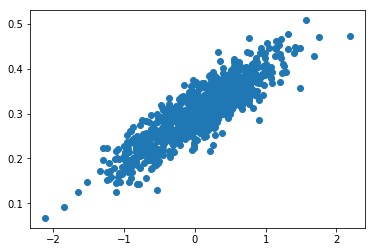

In [10]:
# 좌표 찍기
# y = 0.1 * x + 0.3
num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0, .55)
    y1 = x1 * .1 + .3 + np.random.normal(0, .03)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'o')
plt.show()

0 | w: [-0.02934206],   b: [0.30194885],  loss: 0.006096598692238331


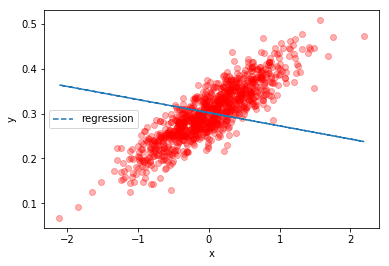

1 | w: [0.01070191],   b: [0.30133778],  loss: 0.0033867661841213703


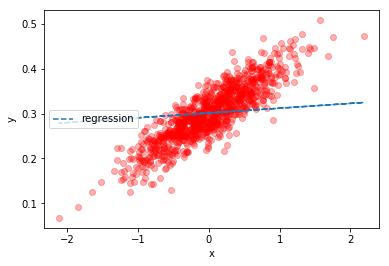

2 | w: [0.03831405],   b: [0.3009455],  loss: 0.0020983528811484575


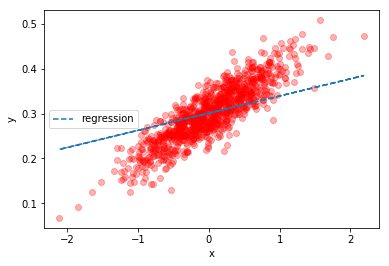

3 | w: [0.05735361],   b: [0.30067497],  loss: 0.0014857645146548748


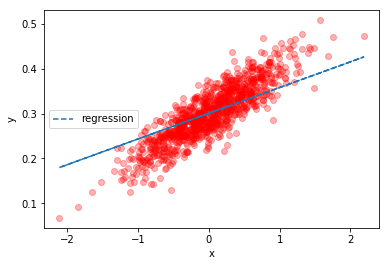

4 | w: [0.07048207],   b: [0.30048847],  loss: 0.0011945035075768828


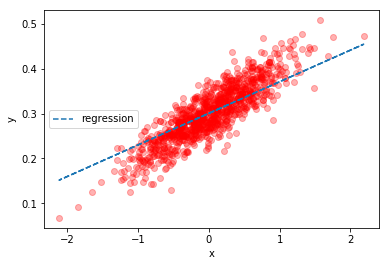

5 | w: [0.0795346],   b: [0.30035985],  loss: 0.0010560208465903997


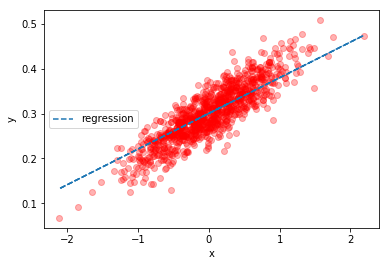

6 | w: [0.08577664],   b: [0.30027115],  loss: 0.0009901780867949128


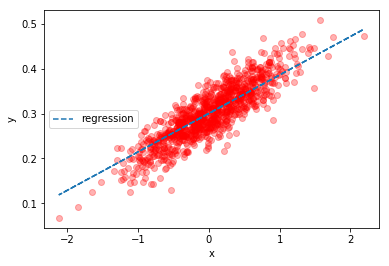

7 | w: [0.09008075],   b: [0.30021],  loss: 0.0009588724351488054


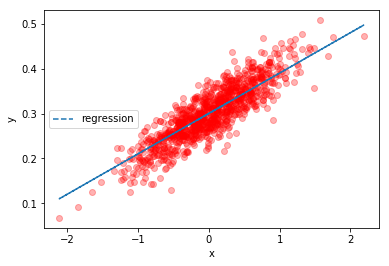

In [28]:
# 경사하강법

### 내부 구조에 정보 추가

# 내부 자료구조에 변수 선언 
w = tf.Variable(tf.random_uniform([1], -1, 1))
b = tf.Variable(tf.zeros(1))
y = w * x_data + b

# 평균제곱오차
loss = tf.reduce_mean(tf.square(y - y_data))

# 옵티마이저 선언 learning_rate = .5
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5)
train = optimizer.minimize(loss)


### 실행

# 변수 초기화
init = tf.global_variables_initializer()  # 변수 초기화
sess = tf.Session()
sess.run(init)  # 초기화 실행


# 10번 반복
for step in range(8):
    sess.run(train)  # optimizer 실행
    print(f'{step} | w: {sess.run(w)},   b: {sess.run(b)},  loss: {sess.run(loss)}')
    plt.plot(x_data, y_data, 'ro', alpha= .3)
    plt.plot(x_data, sess.run(w) * x_data + sess.run(b), '--', label='regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='center left')
    plt.show()